In [1]:
# Step 1: Generate some experimental data
import numpy as np

N = 20

# Let's assume the true spring constant k is 4.5 N/m
k_true = 4.5
np.random.seed(42) # for reproducibility

# Displacement (x) in meters. This is our feature X.
# The .reshape(-1, 1) is needed because scikit-learn expects 2D arrays for features.
xdata = np.linspace(0, 2, N)
x_displacement = xdata.reshape(-1, 1)

# Force (F) in Newtons. This is our target y.
# We'll calculate the true force and add some random "measurement noise"
noise = np.random.normal(0, 0.5, x_displacement.shape)
y_force = k_true * x_displacement + noise

In [2]:
# Build and train the model using Scikit-Learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a linear regression model object
# Check https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
model = LinearRegression()

# Train the model using our data
# The .fit() method is where the 'learning' (Gradient Descent) happens!
model.fit(x_displacement, y_force) # USE ALL data                        

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [3]:
# Analyze the results

# Get the learned parameters (theta_0 and theta_1)
# .intercept_ is an array, so we take the first element
theta_0 = model.intercept_[0]
# .coef_ is a 2D array, so we access it with [0][0]
theta_1 = model.coef_[0][0]

print(f"The model has learned the following equation:")
print(f"Force = {theta_0:.3f} + {theta_1:.3f} * Displacement\n")

print(f"The estimated spring constant (k) is: {theta_1:.3f} N/m")
print(f"The true spring constant was: {k_true} N/m")

y_predicted = theta_0 + theta_1*x_displacement

The model has learned the following equation:
Force = 0.387 + 4.027 * Displacement

The estimated spring constant (k) is: 4.027 N/m
The true spring constant was: 4.5 N/m


In [4]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
import numpy as np
# --- Setup and Plotting ---
output_notebook()

# Create a figure with all properties set at once
p = figure(
    title="Hooke's Law with Model Fit",
    x_axis_label="Displacement (x) [m]",
    y_axis_label="Force (F) [N]",
    width=800, height=400
)

# Plot the original data
p.scatter(x_displacement[:, 0], y_force[:, 0], legend_label='Experimental Data', color='blue', line_color='black', size=10)

# Plot the regression line
p.line(x_displacement[:, 0], y_predicted[:, 0], legend_label='Linear Regression Fit', color='red', line_width=3)

# Display the plot
show(p)

Loading BokehJS ...

In [5]:
def step(theta_0:float, theta_1:float, N:int = 1, alpha: float = 0.1, verbose:bool = False) -> (float, float):
    # util function to print
    mylog = lambda msg: print(msg) if verbose else None
    ytheo = k_true * x_displacement

    for ii in np.arange(0, N):
        mylog("Prediction with full data")
        ypred = theta_0 + theta_1*x_displacement 
        
        mylog("Computing loss")
        error = ypred-ytheo
        loss = np.power(error, 2).sum()/2
        mylog(f"{loss=}")
        
        mylog("Computing the gradients")
        grad_0 = error.mean()
        grad_1 = (error*x_displacement).mean()
        mylog(f"{grad_0=}, {grad_1=}")
        
        mylog("Improving paramether estimation")
        # NOTE: learning rate hyper paramemeter alpha
        theta_0 = theta_0 - alpha*grad_0
        theta_1 = theta_1 - alpha*grad_1
        mylog(f"{theta_0=}, {theta_1=}")

        mylog("")

    return theta_0, theta_1

    

In [6]:
theta_0 = 1.0
theta_1 = 1.0
print(step(theta_0, theta_1, verbose=True))

Prediction with full data
Computing loss
loss=np.float64(107.63157894736842)
Computing the gradients
grad_0=np.float64(-2.4999999999999996), grad_1=np.float64(-3.789473684210526)
Improving paramether estimation
theta_0=np.float64(1.25), theta_1=np.float64(1.3789473684210527)

(np.float64(1.25), np.float64(1.3789473684210527))


In [7]:
# Now with more steps
print(step(theta_0, theta_1, N=1000, verbose=False))

(np.float64(1.0787927631817147e-07), np.float64(4.49999991017813))


In [8]:
import matplotlib.pyplot as plt

# Params
NMAX = 1000
alphas = [0.01, 0.1, 0.5, 0.9] # CHANGE THIS

# YOUR CODE HERE

Shape of training data (X_train): (80, 1)
Shape of testing data (X_test): (20, 1)

Training SGD Regressor for 100 epochs...
Epoch 20: Loss = 0.241773
Epoch 40: Loss = 0.241773
Epoch 60: Loss = 0.241773
Epoch 80: Loss = 0.241773
Epoch 100: Loss = 0.241773

--- Model Evaluation ---
Final Model Intercept: -0.0028 (scaled)
Final Model Coefficient: 0.8690 (scaled)
R-squared (R²): 0.8067
Mean Squared Error (MSE): 0.6555


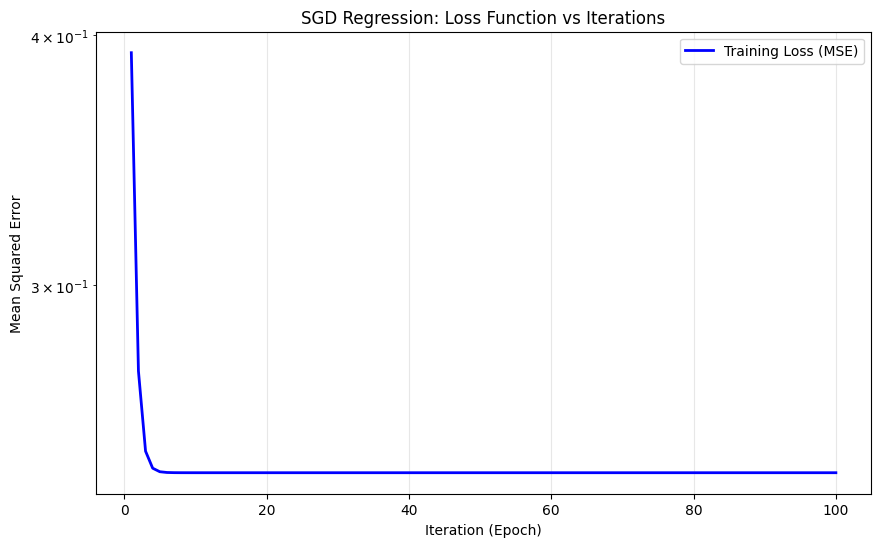

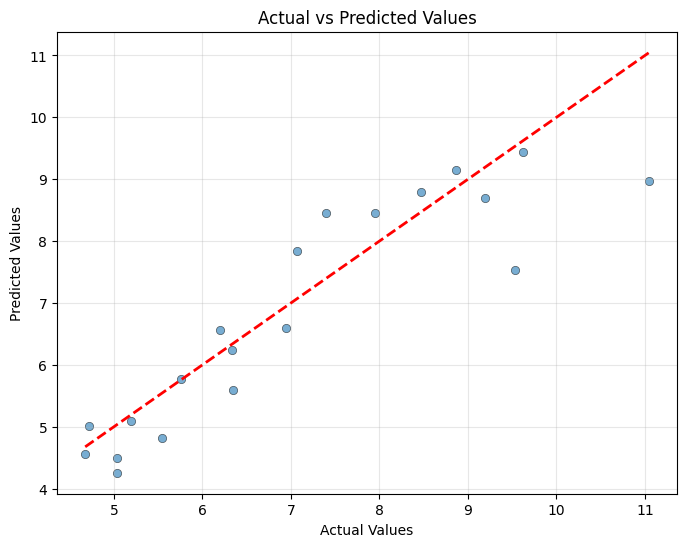


Final training loss: 0.241773
Loss reduction: 38.35%


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

# --- Step 1: Prepare Your Data ---
# Create sample data
np.random.seed(42)
# Create a single feature 'x'. It needs to be a 2D array for sklearn.
X = 2 * np.random.rand(100, 1)
# Create 'y' with a linear relationship to 'x' plus some noise
y = 4 + 3 * X + np.random.randn(100, 1)
y = y.ravel()  # SGDRegressor expects 1D array for y

# --- Step 2: Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Shape of training data (X_train): {X_train.shape}")
print(f"Shape of testing data (X_test): {X_test.shape}")

# --- Step 3: Standardize the Data ---
# SGD is sensitive to feature scaling, so we standardize the features
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Fit the scalers on training data and transform both train and test sets
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# For y, we need to reshape for StandardScaler
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).ravel()

# --- Step 4: Create SGD Regressor and Track Loss Over Iterations ---
# Initialize the SGD model
model = SGDRegressor(learning_rate='constant', eta0=0.01, max_iter=1, 
                     random_state=42, warm_start=True)

# Lists to store loss values and iterations
losses = []
iterations = []

# Number of epochs (full passes through the data)
n_epochs = 100

print(f"\nTraining SGD Regressor for {n_epochs} epochs...")

# Training loop with partial_fit
for epoch in range(n_epochs):
    # Train for one epoch using partial_fit
    model.partial_fit(X_train_scaled, y_train_scaled)
    
    # Make predictions on training data to compute loss
    y_train_pred_scaled = model.predict(X_train_scaled)
    
    # Compute MSE loss on scaled data
    loss = mean_squared_error(y_train_scaled, y_train_pred_scaled)
    
    losses.append(loss)
    iterations.append(epoch + 1)
    
    # Print progress every 20 epochs
    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch + 1}: Loss = {loss:.6f}")

# --- Step 5: Make Predictions on Test Set ---
# Make predictions on scaled test data
y_test_pred_scaled = model.predict(X_test_scaled)

# Transform predictions back to original scale
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).ravel()

# --- Step 6: Compute Final Metrics ---
r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)

print(f"\n--- Model Evaluation ---")
print(f"Final Model Intercept: {model.intercept_[0]:.4f} (scaled)")
print(f"Final Model Coefficient: {model.coef_[0]:.4f} (scaled)")
print(f"R-squared (R²): {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")

# --- Step 7: Plot Loss Function vs Iterations ---
plt.figure(figsize=(10, 6))
plt.plot(iterations, losses, 'b-', linewidth=2, label='Training Loss (MSE)')
plt.xlabel('Iteration (Epoch)')
plt.ylabel('Mean Squared Error')
plt.title('SGD Regression: Loss Function vs Iterations')
plt.grid(True, alpha=0.3)
plt.legend()
plt.yscale('log')  # Use log scale for better visualization of convergence
plt.show()

# Optional: Plot predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, edgecolors='k', linewidth=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True, alpha=0.3)
plt.show()

print(f"\nFinal training loss: {losses[-1]:.6f}")
print(f"Loss reduction: {((losses[0] - losses[-1]) / losses[0] * 100):.2f}%")